   # Simple Neural Network from scratch
   
Details about dataset (CSV) :
- First column is the target variable
- All the others columns contain pixel intensity value (28px x 28px = 784 columns)

## Import

In [132]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Functions

In [133]:
@np.vectorize
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [134]:
class NeuralNetwork:
    def __init__(self,
                nb_input_perceptrons,
                nb_hidden_perceptrons,
                nb_output_perceptrons,
                learning_rate):
        self.nb_input_perceptrons = nb_input_perceptrons
        self.nb_hidden_perceptrons = nb_hidden_perceptrons
        self.nb_output_perceptrons = nb_output_perceptrons
        self.learning_rate = learning_rate
        self.init_matrix()
        
    def init_matrix(self):
        self.W_h = np.random.normal(0, 1, (self.nb_hidden_perceptrons, self.nb_input_perceptrons))
        self.B_h = np.ones((self.nb_hidden_perceptrons,1))
        
        self.W_o = np.random.normal(0, 1, (self.nb_output_perceptrons, self.nb_hidden_perceptrons))
        self.B_o = np.ones((self.nb_output_perceptrons,1))
        
    
    def train_one(self, input_vector, target_vector):
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.W_h, input_vector)
        #print('output_vector1 shape =>', output_vector1.shape)
        #print('self.B_h shape =>', self.B_h.shape)
        
        output_vector1 = np.sum([output_vector1, self.B_h], axis=0)
        
        #print('output_vector1 after add bias shape =>', output_vector1.shape)
        
        output_hidden = sigmoid(output_vector1)
        #print('self.W_o shape =>', self.W_o.shape)
        #print('output_hidden shape =>', output_hidden.shape)
        
        output_vector2 = np.dot(self.W_o, output_hidden)
        #print('output_vector2 shape =>', output_vector2.shape)
        
        output_vector2 = np.sum([output_vector2, self.B_o], axis=0)
        output_network = sigmoid(output_vector2)
        
        output_errors = target_vector - output_network
        # Gradient descent
        tmp = - output_errors * output_network * (1.0-output_network)
        tmp = self.learning_rate * np.dot(tmp, output_hidden.T)
        
        self.W_o = self.W_o -tmp
        
        #Backpropagation
        hidden_errors = np.dot(self.W_o.T, output_errors)
        
        tmp =- hidden_errors *output_hidden * (1-output_hidden)
        self.W_h = self.W_h - self.learning_rate * np.dot(tmp, input_vector.T)
    
    def train(self, data_array, labels_one_hot_array):
        
            for i in range(len(data_array)):
                self.train_one(data_array[i], labels_one_hot_array[i])
            
    def predict(self, input_vector):
        
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.W_h, input_vector)
        output_vector = sigmoid(output_vector)
        
        output_vector = np.dot(self.W_o, output_vector)
        output_vector = sigmoid(output_vector)
        
        return output_vector
    
    def accuracy(self, data, labels):
        
        corrects, wrongs = 0, 0

        for i in range(len(data)):
            res = self.predict(data[i])
            res_max = np.argmax(res)
            if res_max == labels[i]:
                corrects = corrects +1
            else : 
                wrongs = wrongs +1

        return corrects/( wrongs + corrects)


## Train/Test Split

In [135]:
data_train = np.loadtxt('digits_train.csv', delimiter=',')
data_test = np.loadtxt('digits_test.csv', delimiter =',')

In [136]:
data_train.shape

(60000, 785)

## Transformations

In [137]:
std = 0.98/255

train_images = np.asfarray(data_train[:, 1:]) *std +0.01 # Reducing sparsity of images
test_images = np.asfarray(data_test[:, 1:])*std +0.01 # Reducing sparsity of images

train_label = np.asfarray(data_train[:,:1])
test_label = np.asfarray(data_test[:,:1])

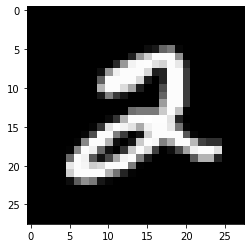

In [138]:
plt.imshow(train_images[5].reshape(28,28), cmap='gray')

In [139]:
train_images.shape

(60000, 784)

In [140]:
train_label.shape

(60000, 1)

In [141]:
lr = np.arange(10)
lr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [142]:
train_labels_one_hot = (lr==train_label).astype(np.float)
test_labels_one_hot = (lr==test_label).astype(np.float)

In [143]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [144]:
ANN = NeuralNetwork(nb_input_perceptrons = 784,
                nb_hidden_perceptrons = 50,
                nb_output_perceptrons =10,
                learning_rate = 0.05)

## Train

In [145]:
ANN.train(train_images, train_labels_one_hot)

## Performance

In [146]:
acc = ANN.accuracy(test_images, test_label)
acc

0.9157

## Impact of the number of hidden neurone on the performance

In [147]:
df_performance = pd.DataFrame(columns = ['nb_hidden_perceptrons', 'accuracy'])

for i in range(10):
    print(i)
    ANN = NeuralNetwork(nb_input_perceptrons = 784,
                nb_hidden_perceptrons = (2*i)*10+1,
                nb_output_perceptrons =10,
                learning_rate = 0.05)
    ANN.train(train_images, train_labels_one_hot)
    
    df_performance.loc[i,'nb_hidden_perceptrons'] =(2*i)*10+1
    df_performance.loc[i, 'accuracy'] = ANN.accuracy(test_images, test_label)

0
1
2
3
4
5
6
7
8
9


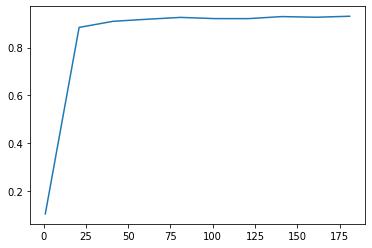

In [148]:
plt.plot(df_performance['nb_hidden_perceptrons'], df_performance['accuracy'])
plt.show()

In [149]:
df_performance['nb_hidden_perceptrons']

0      1
1     21
2     41
3     61
4     81
5    101
6    121
7    141
8    161
9    181
Name: nb_hidden_perceptrons, dtype: object

## Multiple Epoch

In [119]:
ANN = NeuralNetwork(nb_input_perceptrons = 784,
                nb_hidden_perceptrons = 50,
                nb_output_perceptrons =10,
                learning_rate = 0.05)

In [120]:
NB_EPOCHS = 3

for epoch in range(NB_EPOCHS):
    ANN.train(train_images, train_labels_one_hot)
    acc= ANN.accuracy(test_images, test_label)
    print(f"EPOCH #{epoch} => accuracy = {acc}")

EPOCH #0 => accuracy = 0.9095
EPOCH #1 => accuracy = 0.9254
EPOCH #2 => accuracy = 0.9314
